In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

def plot_motif_sets(series, motif_sets, gt=None, dimension_names=None, legend=True):
    if series.ndim == 1:
        series = np.expand_dims(series, axis=1)
    if dimension_names is None:
        dimension_names = [f"dim {d+1}" for d in range(series.shape[1])]

    n = len(series)
    fig, axs = plt.subplots(len(motif_sets) + 1, 1, figsize=(12, (len(motif_sets) + 1) * 1.5), sharex=True, sharey=True)

    if np.array(axs).ndim == 0:
        axs = [axs]

    axs[0].plot(range(len(series)), series, lw=1.5)
    if legend:
        axs[0].legend(dimension_names, fontsize=10)
    axs[0].set_xlim((0, n))

    if gt is not None:
        plot_ground_truth_ax(axs[0], gt, n)

    for i, motif_set in enumerate(motif_sets):
        axs[i+1].set_title(f"Motif Set {i+1}, k: {len(motif_set)}", fontsize=14)
        for s_m, e_m in motif_set:
            axs[i+1].set_prop_cycle(None)
            axs[i+1].plot(range(s_m, e_m), series[s_m : e_m, :], alpha=1, lw=1.5)
            axs[i+1].axvline(x=s_m, c='k', linestyle=':', lw=0.25)
            axs[i+1].axvline(x=e_m, c='k', linestyle=':', lw=0.25)

    plt.tight_layout()
    return fig, axs

def plot_ground_truth_ax(ax, gt, n):
    for key in gt.keys():
        for (s, e) in gt[key]:
            ax.axvline(x=s, c='k', linestyle=':', lw=0.25)
            ax.axvline(x=e, c='k', linestyle=':', lw=0.25)
            
            text_x = (s + ((e - s) // 2)) / float(n)
            text_y = 0.90
            ax.text(text_x, text_y, str(key), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
    plt.tight_layout()
    return ax

(<Figure size 1200x150 with 1 Axes>, [<Axes: >])

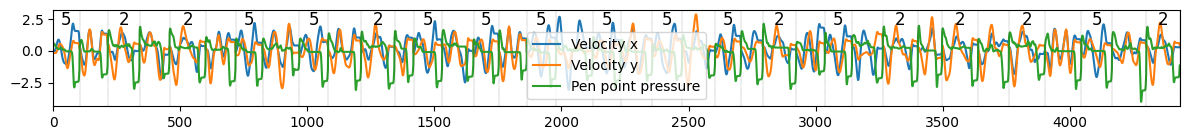

In [3]:
import os
df_validation = pd.read_pickle(os.path.join("..", "benchmark", "charactertrajectories", "validation.pkl"))
ts, gt, *_ = df_validation.iloc[4]
plot_motif_sets(ts, [], gt=gt, dimension_names=['Velocity x', 'Velocity y', 'Pen point pressure'])


(<Figure size 1200x900 with 6 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Motif Set 1, k: 8'}>,
        <Axes: title={'center': 'Motif Set 2, k: 9'}>,
        <Axes: title={'center': 'Motif Set 3, k: 10'}>,
        <Axes: title={'center': 'Motif Set 4, k: 8'}>,
        <Axes: title={'center': 'Motif Set 5, k: 10'}>], dtype=object))

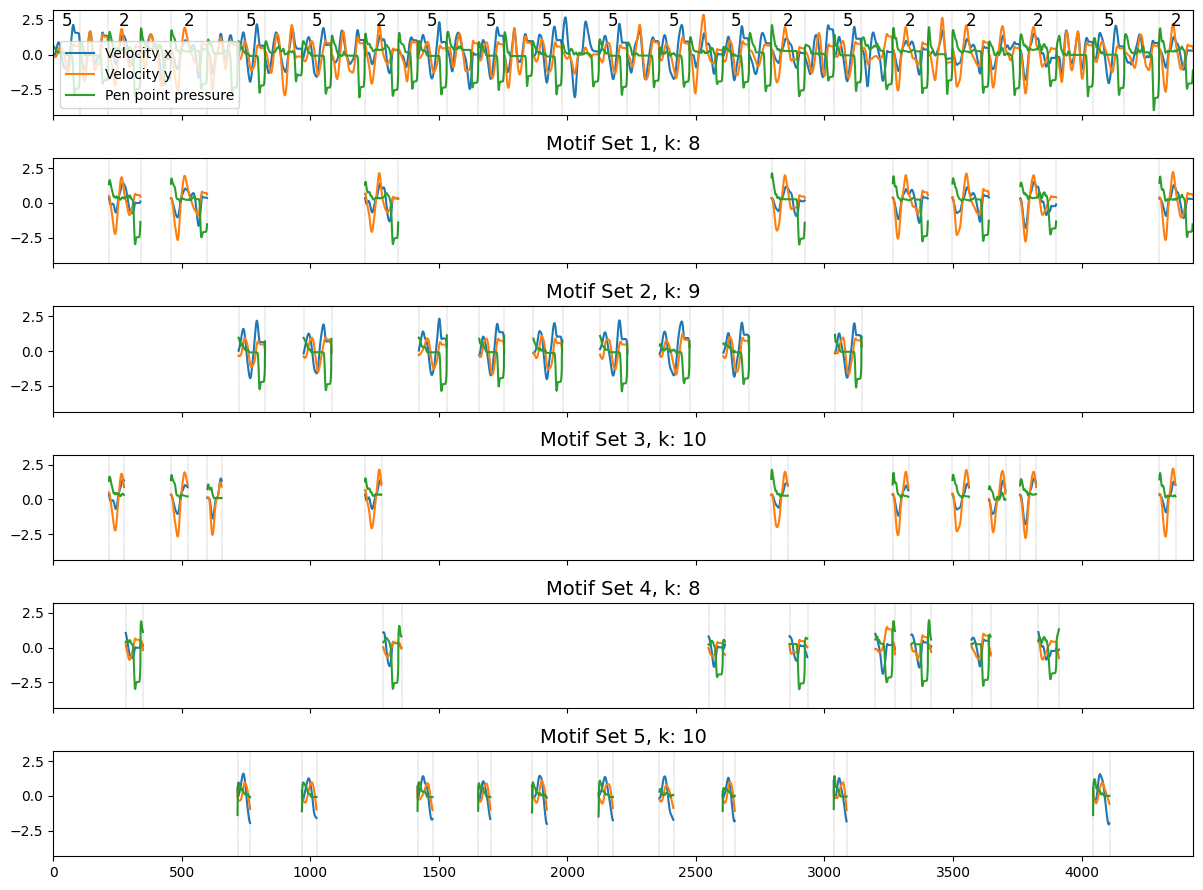

In [4]:
# import locomotif.locomotif as locomotif
# motif_sets = locomotif.apply_locomotif(ts, rho=0.9, l_min=60, l_max=182, nb=5)

motif_sets = [
    [(4303, 4433), (2794, 2924), (1213, 1343), (458, 599), (3498, 3640), (3266, 3403), (217, 340), (3762, 3902)], 
    [(3041, 3146), (2607, 2708), (1422, 1532), (974, 1083), (721, 825), (2359, 2476), (2127, 2234), (1657, 1755), (1868, 1981)], 
    [(458, 524), (3498, 3563), (3265, 3327), (1213, 1277), (4303, 4366), (2793, 2858), (3761, 3824), (217, 276), (3640, 3705), (600, 656)], 
    [(282, 350), (1284, 1355), (2864, 2934), (3338, 3416), (3572, 3647), (3832, 3913), (2549, 2614), (3198, 3275)], 
    [(4045, 4109), (717, 767), (1417, 1476), (967, 1025), (2121, 2178), (1862, 1921), (2358, 2413), (2604, 2652), (3036, 3087), (1653, 1701)]
]

plot_motif_sets(ts, motif_sets, gt=gt, dimension_names=['Velocity x', 'Velocity y', 'Pen point pressure'])

In [5]:
import tsmd_evaluation.prom as prom

M, row_names, col_names = prom.matching_matrix(gt, motif_sets)
print(M)
print()

print("Micro averaged PROM")
print(f"Precision: {prom.micro_averaged_precision(M)}")
print(f"Recall: {prom.micro_averaged_recall(M)}")
print(f"F1-score: {prom.micro_averaged_f1(M)}")
print()
print("Macro averaged PROM")
print(f"Precision: {prom.macro_averaged_precision(M)}")
print(f"Recall: {prom.macro_averaged_recall(M)}")
print(f"F1-score: {prom.macro_averaged_f1(M)}")

[[ 8.  0.  0.  0.  0.  0.]
 [ 0.  9.  0.  0.  1.  1.]
 [ 0.  0. 10.  8.  9. nan]]

Micro averaged PROM
Precision: 1.0
Recall: 0.8947368421052632
F1-score: 0.9444444444444444

Macro averaged PROM
Precision: 1.0
Recall: 0.9090909090909092
F1-score: 0.95


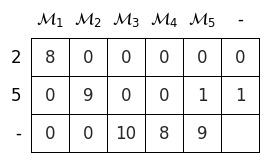

In [6]:
import seaborn as sns
from matplotlib.colors import ListedColormap
M, row_labels, col_labels = prom.matching_matrix(gt, motif_sets)

def plot_matching_matrix(M, row_labels, col_labels, font_size=12):
    g1, d1 = M.shape
    g, d   = g1 - 1, d1 - 1 

    fig, ax = plt.subplots(figsize=(g1, d1))
    sns.heatmap(
        M,
        annot=True,
        annot_kws={"size": font_size},
        linewidths=0.5,
        ax=ax,
        cbar=None,
        linecolor="k",
        square=True,
        cmap=ListedColormap(['white']),
        # cmap='viridis'
    )
    ax.set_xlim([0, d1+0.1])
    ax.set_ylim([g1+0.1, 0])
    ax.set_yticks(np.arange(g1) + 0.5)
    ax.set_xticks(np.arange(d1) + 0.5)

    ax.tick_params(top=False, labeltop=True, bottom=False, labelbottom=False, left=False)
    ax.set_yticklabels([f"${row_labels[i]}$" for i in range(g)] + ["-"], rotation=0, fontsize=font_size)
    ax.set_xticklabels([f"$\mathcal{{M}}_{col_labels[j]}$" for j in range(d)] + ["-"], rotation=0, fontsize=font_size)

plot_matching_matrix(M, row_labels, col_labels)
# plot TP, FP and F